In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cnmaps import get_adm_maps,draw_maps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np

In [2]:
df=pd.read_csv('./landpoint.csv')
df

,Unnamed: 0,name,land,offland
0,0,BOLAVEN,"[125.9, 9.4]","[125.46, 9.4]"
1,1,BOLAVEN,"[123.3, 9.34]","[122.68, 9.309]"
2,2,BOLAVEN,"[118.696, 9.684]","[118.462, 9.723]"
3,0,SANBA,"[126.204, 9.012]","[125.484, 9.102]"
4,1,SANBA,"[118.148, 9.056]","[117.77, 9.14]"
5,0,EWINIAR,"[110.998, 19.972]","[110.986, 20.004]"
6,1,EWINIAR,"[110.494, 20.5]","[110.234, 20.33]"
7,2,EWINIAR,"[110.3, 20.0]","[110.902, 20.002]"
8,3,EWINIAR,"[111.85, 21.675]","[114.445, 22.595]"
9,0,GAEMI,"[120.275, 22.83]","[121.43, 23.292]"


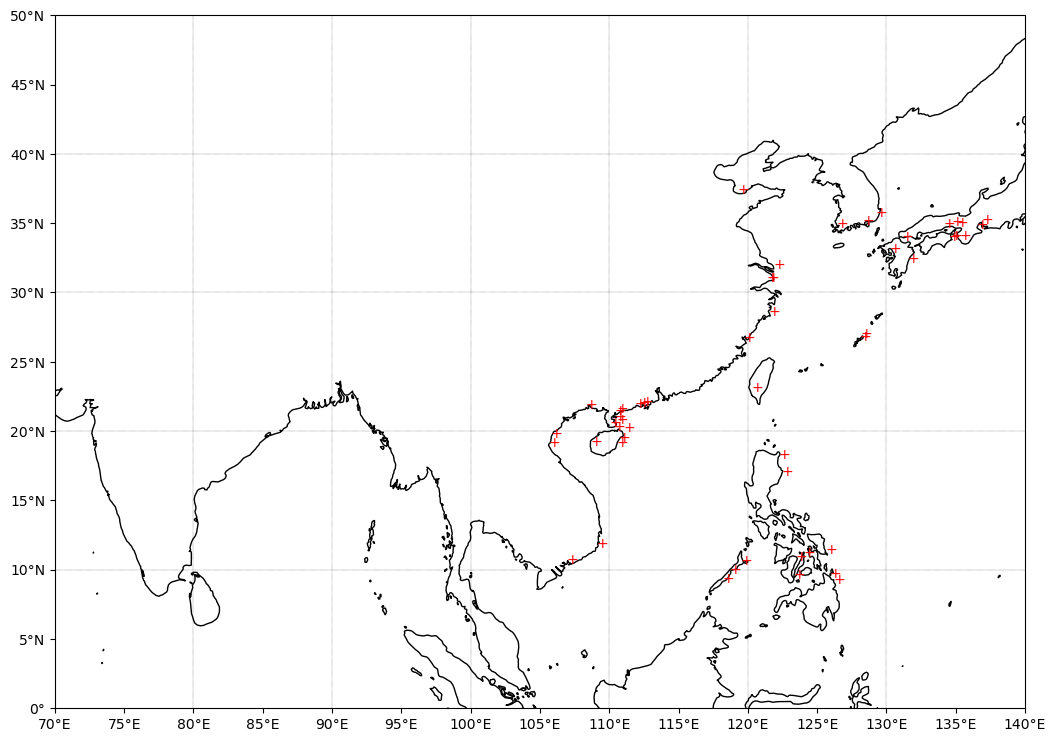

In [3]:
box1 = [70,140,0,50]
fig=plt.figure(figsize=(16,9))
ax=fig.subplots(1,1,subplot_kw={'projection':ccrs.PlateCarree()})
ax.coastlines('50m')
ax.set_extent(box1)
# 坐标轴
## 标注坐标轴
ax.set_extent(box1,crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(box1[0], box1[1] + 5, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(box1[2], box1[3] + 5, 5), crs=ccrs.PlateCarree())
## 经纬度格式，把0经度设置不加E和W
lon_formatter = LongitudeFormatter(zero_direction_label=False)
lat_formatter = LatitudeFormatter()
ax.gridlines(xlocs=np.arange(box1[0], box1[1] + 10, 10), ylocs=np.arange(box1[2], box1[3] + 10, 10), linestyle=':', linewidth=0.3, x_inline=False, y_inline=False, color='k')
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

for name_i,z_i in zip(df['name'],df['land']):
    lon=float(z_i.replace('[','').replace(']','').split(',')[0])
    lat=float(z_i.replace('[','').replace(']','').split(',')[1])
    plt.text(lon,lat,'+',color='red',transform=ccrs.PlateCarree())